# Exercise 4 - Deep learning

Note:

Inspirations:
- https://github.com/tuwien-musicir/DeepLearning_Tutorial/
- https://www.cs.toronto.edu/~kriz/cifar.html

## CIFAR-10

- https://www.cs.toronto.edu/~kriz/cifar.html




## Import dependencies

In [34]:
import glob
import os

import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Convolution2D, Dense, Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from sklearn.metrics import accuracy_score
from tensorflow import keras
import pickle

randomState = 11776836
np.random.seed(randomState)

epochs = 5
batchSize = 32

## Load dataset

Load the data-batches

In [35]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


path = '../data/cifar-10/data'
files = glob.glob(os.path.join(path, '*_*'))

print('Imported ' + str(len(files)) + ' files')

Imported 5 files


## Load the images

In [36]:
images = np.empty([0, 3072], dtype=np.ubyte)
imageNames = []
imageLabels = []

for filename in files:
    fileData = unpickle(filename)
    imageNames.extend(fileData[b'filenames'])
    imageLabels.extend(fileData[b'labels'])
    images = np.append(images, fileData[b'data'], axis=0)

print(len(images), 'images', len(imageNames), 'imageNames', len(imageLabels), 'imageLabels')

50000 images 50000 imageNames 50000 imageLabels


## Create the Groundtruth

In [37]:
# look at the first 25 classes
print("Look at the first 25 labels")
print(imageLabels[0:25], '\n')

uniqueImageLabelSet = set(imageLabels)
print(len(uniqueImageLabelSet), 'unique image labels were found', uniqueImageLabelSet, '\n')

print("Groundtruth Statistics:")
for v in uniqueImageLabelSet:
    print("Class", v, ":", imageLabels.count(v))

# The classes are very balanced
imageClasses = np_utils.to_categorical(imageLabels)

Look at the first 25 labels
[1, 8, 5, 1, 5, 7, 4, 3, 8, 2, 7, 2, 0, 1, 5, 9, 6, 2, 0, 8, 2, 7, 0, 4, 1] 

10 unique image labels were found {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} 

Groundtruth Statistics:
Class 0 : 5000
Class 1 : 5000
Class 2 : 5000
Class 3 : 5000
Class 4 : 5000
Class 5 : 5000
Class 6 : 5000
Class 7 : 5000
Class 8 : 5000
Class 9 : 5000


## Standardization

Here we use Zero-mean Unit-variance standardization which means we deduct the mean and divide by the standard deviation.

(Note: Here, we do this "flat", i.e. one mean and std.dev. for the whole image is computed over all pixels (not per pixel); in RGB images, standardization can be done e.g. for each colour channel individually; in other/non-image data sets, attribute-wise standardization should be applied).

In [38]:
print("Image values statistics:")
print('Min pixel value', images.min())
print('Max pixel value', images.max())

meanValue = images.mean()
stddevValue = images.std()

print('Mean', meanValue)
print('Standard Deviation', stddevValue)

Image values statistics:
Min pixel value 0
Max pixel value 255
Mean 120.70756512369792
Standard Deviation 64.15007589112129


In [39]:
standardizedImagesValue = (images - meanValue) / stddevValue
standardizedImagesValue = np.array(standardizedImagesValue, dtype=float)

print('Standardized mean', standardizedImagesValue.mean())
print('Standardized standard deviation', standardizedImagesValue.std())

print('Standardized min pixel value', standardizedImagesValue.min())
print('Standardized max pixel value', standardizedImagesValue.max())

Standardized mean -1.562009780779287e-17
Standardized standard deviation 1.0000000000000002
Standardized min pixel value -1.8816433721538977
Standardized max pixel value 2.0934103819959606


## Creating NN Models in Keras

### 1) Fully Connected NN

For a fully connected neural network, the x and y axis of an image do not play a role at all. All pixels are considered as a completely individual input to the neural network. Therefore the 2D image arrays have to be flattened to a vector.

In [40]:
print(standardizedImagesValue.shape)

(50000, 3072)


In [41]:
# find out input shape for NN, which is just a long vector
inputShape = standardizedImagesValue.shape[1]
print('Input shape for NN: ', inputShape)

Input shape for NN:  3072


### Creating a Model


In Keras, one can choose between a Sequential model and a Graph model. Sequential models are the standard case. Graph models are for parallel networks and use the functional API (see Music/Speech tutorial).

Here we create a sequential model with 2 fully connected (a.k.a. 'dense') layers containing 256 units each.

In [42]:
# simple Fully-connected network

model = Sequential()
model.add(Dense(256, input_dim=inputShape))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(len(uniqueImageLabelSet), activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 256)               786688    
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________


### Defining Loss Function and Optimizer Strategy: Gradient Descent

In [43]:
# Define a loss function
loss = 'categorical_crossentropy'  # 'categorical_crossentropy' for multi-class problems

# Optimizer = Stochastic Gradient Descent
optimizer = 'sgd'

# Compiling the model
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

### Training the model on the input dataset

In [44]:
# train the model
model.fit(standardizedImagesValue, imageClasses, batch_size=batchSize, epochs=epochs)

Epoch 1/5


2022-06-28 21:20:49.449699: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 11s 7ms/step - loss: 1.8211 - accuracy: 0.3607
Epoch 2/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6942 - accuracy: 0.4138
Epoch 3/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6417 - accuracy: 0.4335
Epoch 4/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6023 - accuracy: 0.4505
Epoch 5/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5694 - accuracy: 0.4631


#### Verify accuracy on training set

In [45]:
predictions = model.predict(standardizedImagesValue)
predictedClassesTrain = np.argmax(predictions, axis=1)
trainImageLabelsForComparison = np.array(imageLabels)
accuracyTrainingSet = accuracy_score(trainImageLabelsForComparison, predictedClassesTrain)

print('Accuracy:', accuracyTrainingSet)

2022-06-28 21:21:41.164448: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 6s 4ms/step
Accuracy: 0.47762


### Testing with Test data set

In [46]:
path = '../data/cifar-10'
files = glob.glob(os.path.join(path, 'test_batch'))
print('Imported', len(files), 'file.')

Imported 1 file.


In [47]:
testImages = np.empty([0, 3072], dtype=np.ubyte)
testImageNames = []
testImageLabels = []

for filename in files:
    fileData = unpickle(filename)
    testImageNames.extend(fileData[b'filenames'])
    testImageLabels.extend(fileData[b'labels'])
    testImages = np.append(testImages, fileData[b'data'], axis=0)

print(len(images), 'images', len(imageNames), 'imageNames', len(imageLabels), 'imageLabels')

comparisonTestImageLabels = np.array(testImageLabels)
testImageClasses = np_utils.to_categorical(testImageLabels)

50000 images 50000 imageNames 50000 imageLabels


In [48]:
print("Groundtruth Statistics:")
for v in set(testImageLabels):
    print("Label", v, ":", testImageLabels.count(v))

Groundtruth Statistics:
Label 0 : 1000
Label 1 : 1000
Label 2 : 1000
Label 3 : 1000
Label 4 : 1000
Label 5 : 1000
Label 6 : 1000
Label 7 : 1000
Label 8 : 1000
Label 9 : 1000


### Standardize Test Set

In [49]:
print(testImages.mean(), testImages.std())

standardDeviationTestImages = (testImages - meanValue) / stddevValue

print(standardDeviationTestImages.mean(), standardDeviationTestImages.std())

121.52915475260417 64.06097012299574
0.012807305642174001 0.9986109795368486


### Make predictions

In [50]:
testPrediction = model.predict(standardDeviationTestImages)
testPredictionClasses = np.argmax(testPrediction, axis=1)
accuracyTestSet = accuracy_score(comparisonTestImageLabels, testPredictionClasses)
print('Accuracy:', accuracyTestSet)

313/313 [==============================] - 1s 3ms/step
Accuracy: 0.4507


## 2) CNN

In [51]:
nChannels = 3

keras.backend.set_image_data_format('channels_last')
trainImages = standardizedImagesValue.reshape(standardizedImagesValue.shape[0], 32, 32, nChannels)
testImages = standardDeviationTestImages.reshape(standardDeviationTestImages.shape[0], 32, 32, nChannels)

In [52]:
print(trainImages.shape)
print(testImages.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [53]:
# we store the new shape of the images in the 'input_shape' variable.
# take all dimensions except the 0th one (which is the number of images)

inputShape = trainImages.shape[1:]
print(inputShape)

(32, 32, 3)


### Create the CNN model

In [54]:
def createMyModel():
    model = Sequential()

    model.add(Convolution2D(inputShape[0] * 2, (3, 3), input_shape=inputShape, activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))

    model.add(Convolution2D(inputShape[0] * 2, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))

    model.add(Dropout(0.3))
    model.add(Convolution2D(inputShape[0] * 2, (3, 3), activation='relu'))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(inputShape[0] * 2, activation='relu'))
    model.add(keras.layers.Dense(len(uniqueImageLabelSet), activation='softmax'))

    return model


model = createMyModel()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 15, 15, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 6, 6, 64)         

### Train the CNN

In [55]:
# Compiling the model
loss = 'categorical_crossentropy'
optimizer = 'sgd'

model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

history = model.fit(trainImages, imageClasses, batch_size=batchSize, epochs=epochs)

Epoch 1/5
1563/1563 [==============================] - 55s 35ms/step - loss: 1.8711 - accuracy: 0.3227
Epoch 2/5
1563/1563 [==============================] - 52s 33ms/step - loss: 1.5709 - accuracy: 0.4343
Epoch 3/5
1563/1563 [==============================] - 52s 33ms/step - loss: 1.4647 - accuracy: 0.4761
Epoch 4/5
1563/1563 [==============================] - 53s 34ms/step - loss: 1.3849 - accuracy: 0.5068
Epoch 5/5
1563/1563 [==============================] - 53s 34ms/step - loss: 1.3187 - accuracy: 0.5323


### Verify accuracy on training set

In [56]:
# verify accuracy on test set
prediction = model.predict(testImages)
predictedClasses = np.argmax(prediction, axis=1)
accuracyOnTestSet = accuracy_score(comparisonTestImageLabels, predictedClasses)
print('Accuracy:', accuracyOnTestSet)

313/313 [==============================] - 3s 10ms/step
Accuracy: 0.5542


### Plotting the training curve

In [57]:
hist = history.history
hist.keys()

dict_keys(['loss', 'accuracy'])

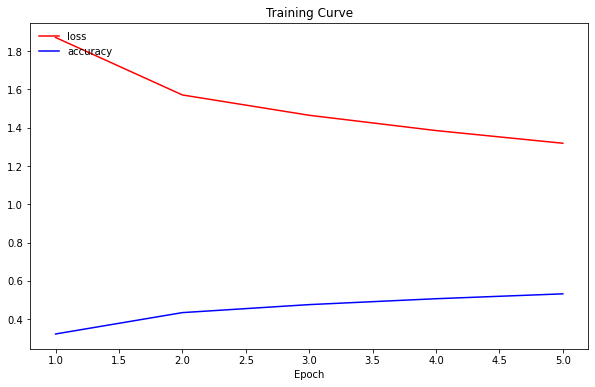

In [58]:
colors = {'loss': 'r', 'accuracy': 'b'}
plt.figure(figsize=(10, 6))
plt.title("Training Curve")
plt.xlabel("Epoch")

for measure in hist.keys():
    color = colors[measure]
    plt.plot(range(1, epochs + 1), hist[measure], color + '-', label=measure)  # use last 2 values to draw line

plt.legend(loc='upper right', scatterpoints=1, frameon=False)

## Data Augmentation

In [59]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# recreate and recompile the model (otherwise we continue learning)
model = createMyModel()
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

# fits the model on batches with real-time data augmentation:
history = model.fit(datagen.flow(trainImages, imageClasses, batch_size=batchSize),
                    epochs=epochs)

Epoch 1/5
1563/1563 [==============================] - 53s 33ms/step - loss: 2.1061 - accuracy: 0.2192
Epoch 2/5
1563/1563 [==============================] - 55s 35ms/step - loss: 1.9235 - accuracy: 0.2872
Epoch 3/5
1563/1563 [==============================] - 57s 36ms/step - loss: 1.8670 - accuracy: 0.3089
Epoch 4/5
1563/1563 [==============================] - 53s 34ms/step - loss: 1.8279 - accuracy: 0.3239
Epoch 5/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.7928 - accuracy: 0.3374


In [60]:
# verify accuracy on test set with augmentation
predictions = model.predict(testImages)
predicatedClasses = np.argmax(predictions, axis=1)
accuracy = accuracy_score(comparisonTestImageLabels, predicatedClasses)
print('Accuracy', accuracy)

313/313 [==============================] - 4s 10ms/step
Accuracy 0.3371


### Plotting the training curve with data augmentation

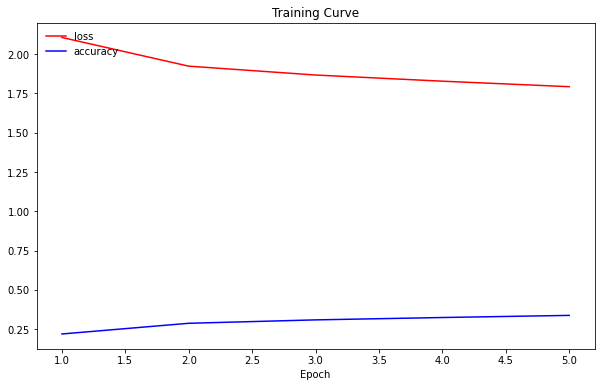

In [61]:
hist = history.history

plt.figure(figsize=(10, 6))
plt.title("Training Curve")
plt.xlabel("Epoch")

for measure in hist.keys():
    color = colors[measure]
    plt.plot(range(1, epochs + 1), hist[measure], color + '-', label=measure)

plt.legend(loc='upper right', scatterpoints=1, frameon=False)

## Analysis